In [17]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка визуализации
plt.style.use('ggplot')
%matplotlib inline

# Загрузка данных
sales_df = pd.read_csv('sales_data.csv')

# 2. Первичный анализ данных
# Исследуйте структуру данных
print("Вывод первых 5 строк")
print(sales_df.head()) 
print("Информация о столбцах и типах данных")
print(sales_df.info())  
print("Описание числовых столбцов")
print(sales_df.describe())  

Вывод первых 5 строк
         Date     Category             Product  Quantity  Price  Region
0  2023-01-05  Smartphones  Samsung Galaxy S21         2  54990  Center
1  2023-01-05  Accessories         iPhone Case         5   1200   South
2  2023-01-06      Laptops         HP Pavilion         1  62500    West
3  2023-01-07        Audio     Sony Headphones         3   4990  Center
4  2023-01-08  Smartphones           iPhone 13         2  79990   North
Информация о столбцах и типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      128 non-null    object
 1   Category  128 non-null    object
 2   Product   128 non-null    object
 3   Quantity  128 non-null    int64 
 4   Price     128 non-null    int64 
 5   Region    128 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.1+ KB
None
Описание числовых столбцов
         Quantity   

In [25]:
# 3. Подготовка данных
# Создайте столбец 'Revenue' = Quantity * Price
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['Price']

# Преобразуйте 'Date' в datetime и извлеките месяц/день недели
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Weekday'] = sales_df['Date'].dt.day_name()

In [23]:
# 4. Анализ по категориям
# Рассчитайте выручку по категориям
category_revenue = sales_df.groupby('Category')['Revenue'].sum().reset_index()
print(category_revenue)

      Category  Revenue
0  Accessories   257700
1        Audio  1321970
2      Laptops  4275700
3  Smartphones  7240510
4           TV  4319160


In [21]:
# 5. Анализ по месяцам
# Проанализируйте динамику продаж по месяцам
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum().reset_index()
print(monthly_revenue)


    Month  Revenue
0       1   762000
1       2   874190
2       3   959840
3       4  1018570
4       5  1292090
5       6  1522410
6       7  1304460
7       8  1793510
8       9  1258470
9      10  2249450
10     11  1870870
11     12  2509180


In [45]:
# 6. Топ продуктов
# Определите топ-5 самых продаваемых товаров
top_products = sales_df.groupby('Product')['Quantity'].sum().nlargest(5).reset_index()
print(top_products)

                Product  Quantity
0           USB-C Cable        78
1      Screen Protector        63
2  Xiaomi Redmi Note 10        51
3    Samsung Galaxy S21        40
4             iPhone 13        37


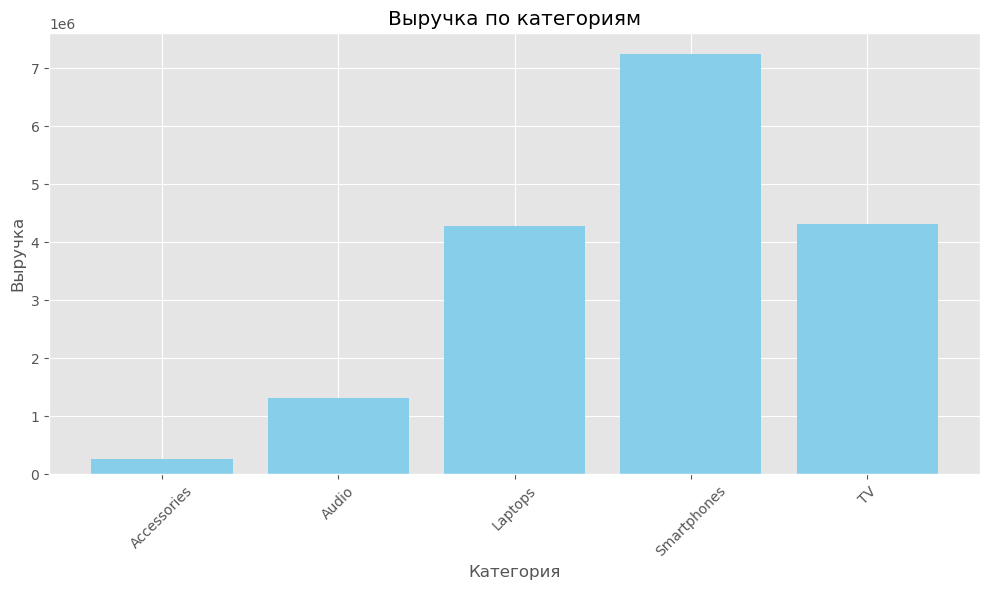

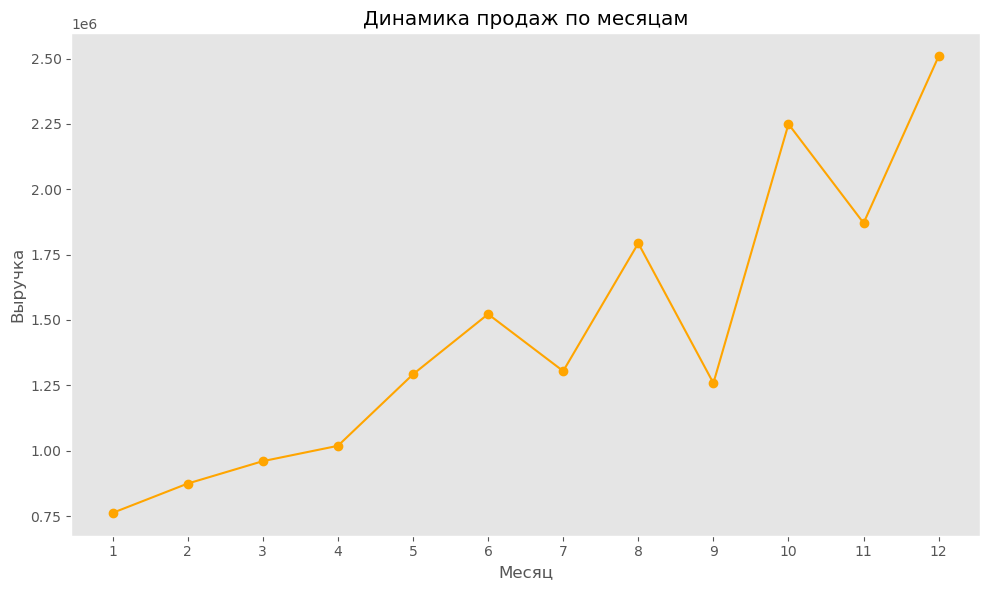

In [29]:
# 7. Визуализация

# Визуализация выручки по категориям
plt.figure(figsize=(10, 6))
plt.bar(category_revenue['Category'], category_revenue['Revenue'], color='skyblue')
plt.title('Выручка по категориям')
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация динамики продаж по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color='orange')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(monthly_revenue['Month'])
plt.grid()
plt.tight_layout()
plt.show()


In [43]:
# 8. Выводы
total_units_sold = sales_df['Quantity'].sum()
total_revenue = sales_df['Revenue'].sum()
most_popular_category = category_revenue.loc[category_revenue['Revenue'].idxmax(), 'Category']
highest_revenue_region = sales_df.groupby('Region')['Revenue'].sum().idxmax()
best_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax(), 'Month']
best_selling_product = top_products.iloc[0]['Product']

print(f"Общие продажи: {total_units_sold} единиц товара")
print(f"Общая выручка: ${total_revenue:,.2f}")
print(f"Самая популярная категория: {most_popular_category}")
print(f"Регион с наибольшей выручкой: {highest_revenue_region}")
print(f"Лучший месяц: {best_month}")
print(f"Самый продаваемый товар: {best_selling_product}")

# Рекомендации
recommendations = [
    f" 1. Увеличить ассортимент в категории {most_popular_category} как самой популярной.",
    f" 2. Расширить маркетинговые кампании в регионе {highest_revenue_region}.",
    f" 3. Планировать акции на {best_month}  для максимизации сезонного эффекта.",
    f" 4. Увеличить складские запасы {best_selling_product} для предотвращения дефицита."
]

print("\nРекомендации:")
for recommendation in recommendations:
    print(recommendation)

Общие продажи: 631 единиц товара
Общая выручка: $17,415,040.00
Самая популярная категория: Smartphones
Регион с наибольшей выручкой: East
Лучший месяц: 12
Самый продаваемый товар: USB-C Cable

Рекомендации:
 1. Увеличить ассортимент в категории Smartphones как самой популярной.
 2. Расширить маркетинговые кампании в регионе East.
 3. Планировать акции на 12  для максимизации сезонного эффекта.
 4. Увеличить складские запасы USB-C Cable для предотвращения дефицита.
